In [1]:
from qiskit import QuantumCircuit, transpile
import numpy as np

num_qubits = 8
qc = QuantumCircuit(num_qubits)
num_layers = int(np.ceil(np.log2(num_qubits)))


In [2]:
from qcc.ml import USE_CUDA

USE_CUDA

KeyboardInterrupt: 

In [ ]:
from itertools import zip_longest, tee

def convolve(wires):
    qc.rz(0.1, wires[0])
    qc.sx(wires[0])
    qc.rz(0.1, wires[0])
    qc.sx(wires[0])
    qc.rz(0.1, wires[0])
    
    qc.rz(0.1, wires[1])
    qc.sx(wires[1])
    qc.rz(0.1, wires[1])
    qc.sx(wires[1])
    qc.rz(0.1, wires[1])
    
    qc.cnot(wires[0], wires[1])
    qc.ry(0.1, wires[0])
    qc.rz(0.1, wires[1])
    qc.cnot(wires[1], wires[0])
    qc.ry(0.1, wires[0])
    qc.cnot(wires[0], wires[1])
    
    qc.rz(0.1, wires[0])
    qc.sx(wires[0])
    qc.rz(0.1, wires[0])
    qc.sx(wires[0])
    qc.rz(0.1, wires[0])
    
    qc.rz(0.1, wires[1])
    qc.sx(wires[1])
    qc.rz(0.1, wires[1])
    qc.sx(wires[1])
    qc.rz(0.1, wires[1])
        
def pool(wires):
    qc.crz(0.1, wires[0], wires[1])
    qc.x(wires[0])
    qc.crx(0.1, wires[0], wires[1])

def _convolution(iterable):
    a, b = tee(iterable)
    first = next(b, None)
    lst = list(zip_longest(a, b, fillvalue=first))
    last = lst.pop()[::-1]
    lst = lst[::2] + lst[1::2]

    if len(lst) > 1:
        lst.insert(0, last)

    for wires in lst:
        convolve(wires)

def _pooling(iterable):
    measurements = iterable[1::2]
    controlled = iterable[0::2]

    for wires in zip(measurements, controlled):
        pool(wires)

    return controlled

wires = qc.qubits
for _ in range(num_layers):
    _convolution(wires)
    wires = _pooling(wires)


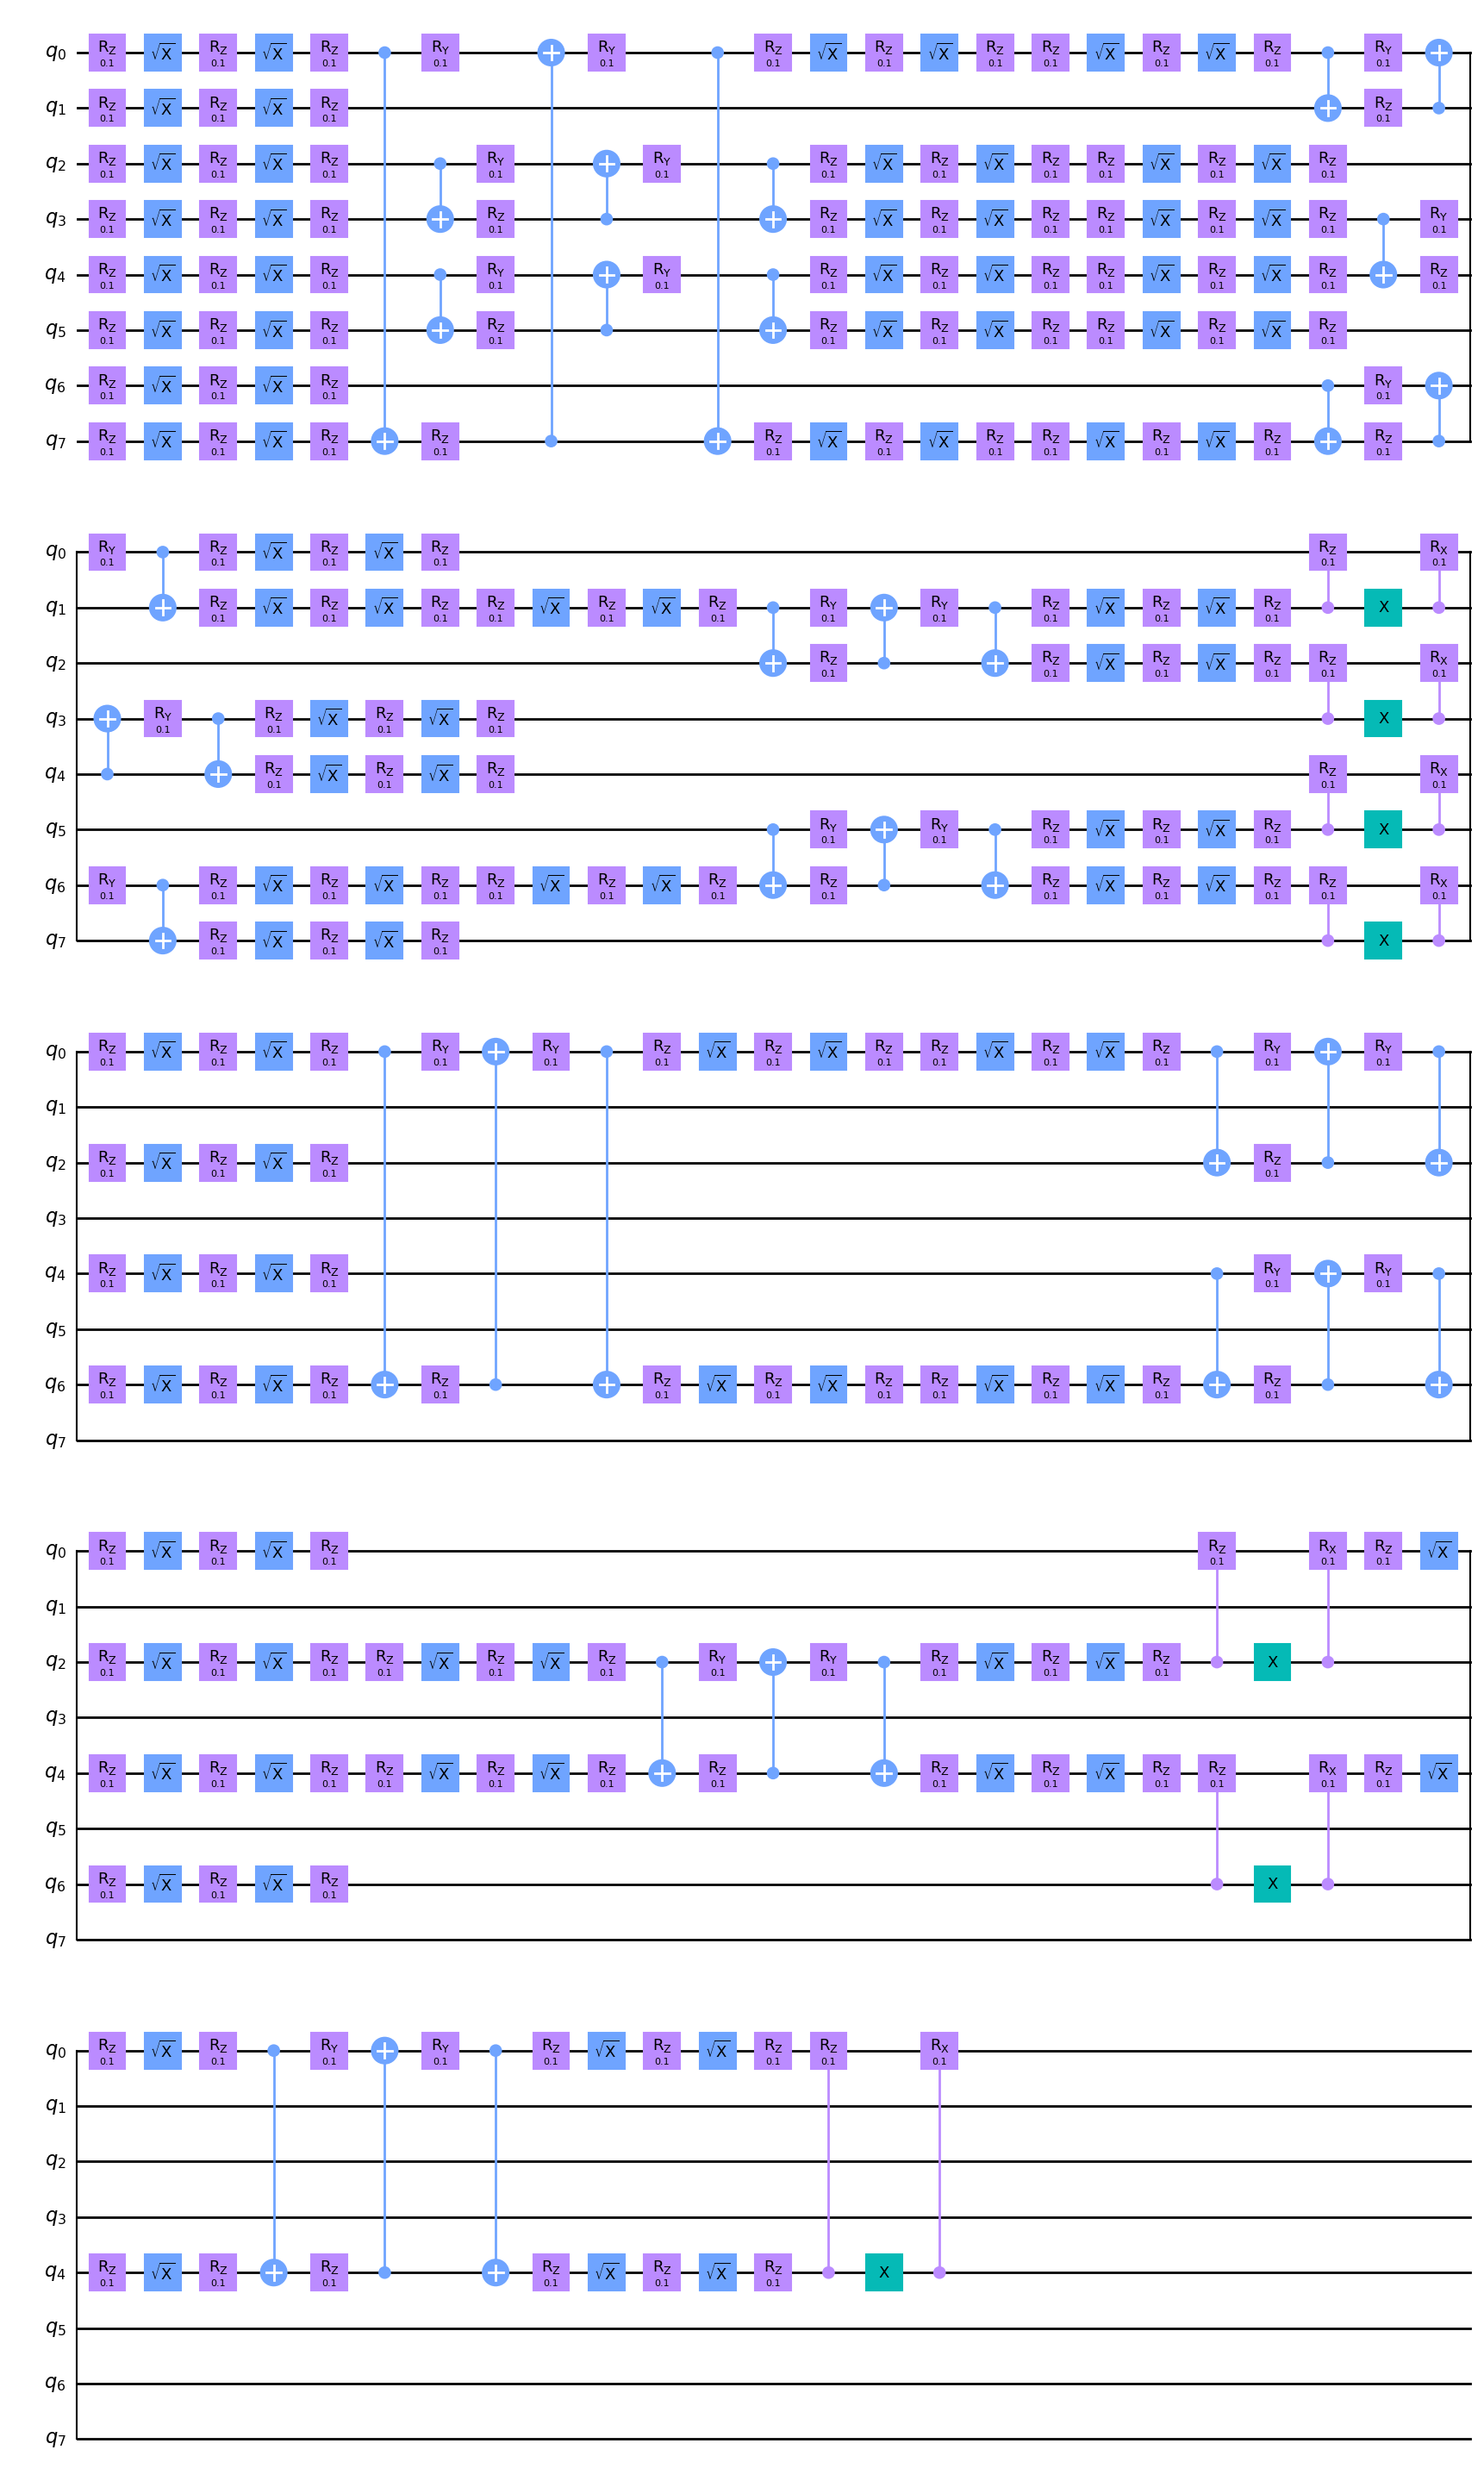

In [ ]:
qc.draw('mpl')


In [ ]:
qc = transpile(qc, basis_gates=["cx", "sx", "x", "ry", "rx", "rz"], optimization_level=0)
qc.depth(), sum(qc.count_ops().values())


(135, 415)

In [ ]:
135, 415
188, 593


(188, 593)

In [ ]:
qc = QuantumCircuit(num_qubits)

def _ry_pool(iterable):
    measurements = iterable[1::2]
    controlled = iterable[0::2]

    for wires in zip(measurements, controlled):
        qc.cry(0.1, wires[0], wires[1])

    return controlled

wires = qc.qubits
for _ in range(num_layers):
    wires = _ry_pool(wires)
    
qc = transpile(qc, basis_gates=["cx", "sx", "x", "ry", "rx", "rz"], optimization_level=0)
qc.depth(), sum(qc.count_ops().values())


(12, 28)

In [ ]:
import plotly.io as pio

pio.templates["plotly"]

layout.Template({
    'data': {'bar': [{'error_x': {'color': '#2a3f5f'},
                      'error_y': {'color': '#2a3f5f'},
                      'marker': {'line': {'color': '#E5ECF6', 'width': 0.5},
                                 'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}},
                      'type': 'bar'}],
             'barpolar': [{'marker': {'line': {'color': '#E5ECF6', 'width': 0.5},
                                      'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}},
                           'type': 'barpolar'}],
             'carpet': [{'aaxis': {'endlinecolor': '#2a3f5f',
                                   'gridcolor': 'white',
                                   'linecolor': 'white',
                                   'minorgridcolor': 'white',
                                   'startlinecolor': '#2a3f5f'},
                         'baxis': {'endlinecolor': '#2a3f5f',
                                   'gridcolor': 'white',


In [3]:
import plotly.graph_objects as go
import plotly.io as pio

template = go.layout.Template(layout=go.Layout(
    font=go.layout.Font(family="Inter Nerd Font", size=16, color="black"),
    title_font=go.layout.title.Font(family="Inter Nerd Font SemiBold", size=24, color="black"),
    xaxis_title_font=go.layout.xaxis.title.Font(family="Inter Nerd Font SemiBold", size=24, color="black"),
    width=1800, # 6in @ 300dpi
    height=1500, # 5in @ 300dpi,
    paper_bgcolor="white",
    plot_bgcolor="lightgray",
))
pio.templates["kuarq"] = template
pio.templates.default = "plotly+kuarq"


fig = go.Figure(
    data=[
        go.Scatter(x=[1, 2, 3], y=[1, 3, 2], name="test"),
        go.Scatter(x=[1, 2, 3], y=[3, 2, 1], name="test2")
    ],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object"),
        xaxis=go.layout.XAxis(title_text="test"),
    )
)

fig.show()